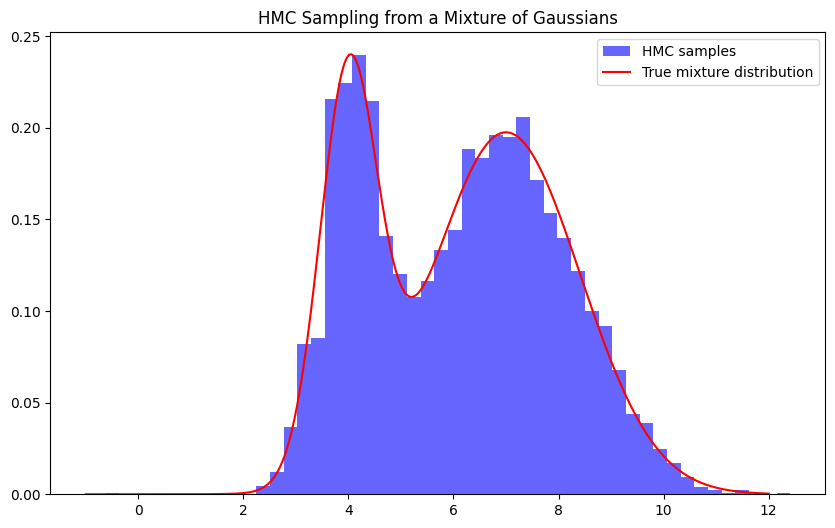

In [36]:
import numpy as np
import matplotlib.pyplot as plt

# 定义混合高斯分布的负对数密度函数（势能函数）
def log_p(x):
    # 混合高斯分布的两个成分
    component_1 = 0.3 * np.exp(-0.5 * (x - 4)**2 / 0.3) / np.sqrt(2 * np.pi * 0.3)
    component_2 = 0.7 * np.exp(-0.5 * (x - 7)**2 / 2) / np.sqrt(2 * np.pi * 2)
    
    # 目标分布的负对数
    return -np.log(component_1 + component_2)

# 计算势能的梯度（对数密度的负梯度）
def grad_log_p(x):
    # 混合高斯分布的两个成分的梯度
    grad_1 = (x - 4) / 0.3 * np.exp(-0.5 * (x - 4)**2 / 0.3) / np.sqrt(2 * np.pi * 0.3)
    grad_2 = (x - 7) / 2 * np.exp(-0.5 * (x - 7)**2 / 2) / np.sqrt(2 * np.pi * 2)
    
    # 返回总的梯度
    return -(grad_1 + grad_2)

# Leapfrog 算法（数值模拟哈密尔顿方程）
def leapfrog(x, p, epsilon):
    # 第一步：更新动量
    p -= 0.5 * epsilon * grad_log_p(x)
    
    # 第二步：更新位置
    x += epsilon * p
    
    # 第三步：更新动量
    p -= 0.5 * epsilon * grad_log_p(x)
    
    return x, p

# Metropolis-Hastings 接受率函数
def metropolis_acceptance(x0, p0, x_new, p_new, epsilon):
    # 计算哈密尔顿量（能量）差值
    H0 = log_p(x0) + 0.5 * np.dot(p0, p0)
    H_new = log_p(x_new) + 0.5 * np.dot(p_new, p_new)
    
    # 接受概率
    alpha = np.min([1, np.exp(H0 - H_new)])
    
    # 以 alpha 的概率接受新位置
    return x_new if np.random.rand() < alpha else x0

# HMC 采样算法
def hmc_sampler(num_samples, epsilon, L):
    # 初始化样本
    samples = []
    
    # 初始位置 x0
    x0 = np.random.randn()
    
    for _ in range(num_samples):
        # 初始化动量 p0（从标准正态分布中采样）
        p0 = np.random.randn()
        
        # 对 (x0, p0) 进行一次哈密尔顿动力学模拟
        x_new, p_new = x0, p0
        for _ in range(L):
            x_new, p_new = leapfrog(x_new, p_new, epsilon)
        
        # 使用 Metropolis-Hastings 算法接受或拒绝
        x0 = metropolis_acceptance(x0, p0, x_new, p_new, epsilon)
        
        # 保存采样结果
        samples.append(x0)
    
    return np.array(samples)

# 设置 HMC 参数
num_samples = 10000  # 采样数量
epsilon = 0.1        # 步长
L = 20               # Leapfrog 步数

# 生成 HMC 采样
samples_10000 = hmc_sampler(num_samples, epsilon, L)

# 绘制结果
x = np.linspace(-1, 12, 1000)
y = 0.3 * np.exp(-0.5 * (x - 4)**2 / 0.3) / np.sqrt(2 * np.pi * 0.3) + 0.7 * np.exp(-0.5 * (x - 7)**2 / 2) / np.sqrt(2 * np.pi * 2)

plt.figure(figsize=(10, 6))
plt.hist(samples_10000, bins=50, density=True, alpha=0.6, color='b', label='HMC samples')
plt.plot(x, y, 'r-', label='True mixture distribution')
plt.title('HMC Sampling from a Mixture of Gaussians')
plt.legend()
plt.show()


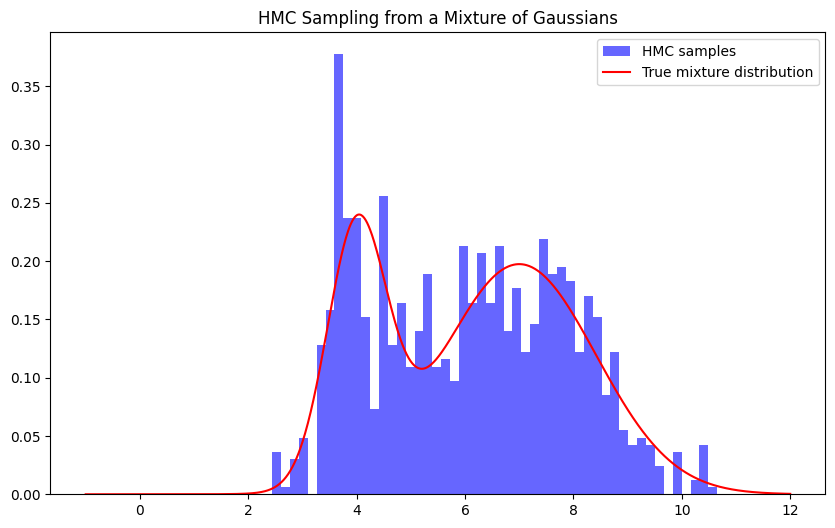

In [37]:
num_samples = 1000  # 采样数量
epsilon = 0.1        # 步长
L = 20               # Leapfrog 步数

# 生成 HMC 采样
samples_1000 = hmc_sampler(num_samples, epsilon, L)

# 绘制结果
x = np.linspace(-1, 12, 1000)
y = 0.3 * np.exp(-0.5 * (x - 4)**2 / 0.3) / np.sqrt(2 * np.pi * 0.3) + 0.7 * np.exp(-0.5 * (x - 7)**2 / 2) / np.sqrt(2 * np.pi * 2)

plt.figure(figsize=(10, 6))
plt.hist(samples_1000, bins=50, density=True, alpha=0.6, color='b', label='HMC samples')
plt.plot(x, y, 'r-', label='True mixture distribution')
plt.title('HMC Sampling from a Mixture of Gaussians')
plt.legend()
plt.show()

## 计算均方误差和标准差误差

In [51]:
# 目标分布的参数
mu1, sigma1, weight1 = 4, 0.3, 0.3  # 第一个高斯分布
mu2, sigma2, weight2 = 7, 2, 0.7  # 第二个高斯分布

# 计算目标分布的均值和标准差（理论值）
target_mean = weight1 * mu1 + weight2 * mu2  # 混合高斯分布的加权均值
target_std = np.sqrt(weight1 * (sigma1 + (mu1 - target_mean)**2) + 
                     weight2 * (sigma2 + (mu2 - target_mean)**2))  # 混合高斯分布的标准差


# 计算 HMC 样本的均值和标准差
hmc_mean = np.mean(samples_10000)
hmc_std = np.std(samples_10000)

# 计算均方误差（MSE）
mse = np.mean((samples_10000 - target_mean)**2)
# 计算标准差误差
std_error = abs(hmc_std - target_std)
mse,target_std**2,std_error

(3.3820191598433555, 3.38, 0.0005409020590076974)

In [50]:
# 计算 HMC 样本的均值和标准差
hmc_mean = np.mean(samples_1000)
hmc_std = np.std(samples_1000)

# 计算均方误差（MSE）
mse = np.mean((samples_1000 - target_mean)**2)
# 计算标准差误差
std_error = abs(hmc_std - target_std)
mse,target_std**2,std_error

(3.319947247436632, 3.38, 0.017236807762742945)

In [41]:
hmc_mean = np.mean(samples_100)
hmc_std = np.std(samples_100)

# 计算均方误差（MSE）
mse = np.mean((samples_100 - target_mean)**2)
# 计算标准差误差
std_error = abs(hmc_std - target_std)
mse,target_std**2

(2.4065551915710106, 3.38)

## 计算KS散度

In [42]:
from scipy.stats import norm
# 计算目标分布的CDF
def target_cdf(x):
    # 使用数值积分估计目标混合高斯分布的CDF
    return weight1 * norm.cdf(x, mu1, np.sqrt(sigma1)) + weight2 * norm.cdf(x, mu2, np.sqrt(sigma2))

# 计算HMC样本的CDF
def sample_cdf(samples, x):
    # 计算HMC样本的经验CDF
    return np.array([np.sum(samples <= xi) / len(samples) for xi in x])

# 定义要评估CDF的x轴范围
x_vals = np.linspace(min(samples_10000), max(samples_10000), 1000)

# 计算目标分布的CDF
target_cdf_vals = target_cdf(x_vals)


In [44]:
# 计算HMC样本的经验CDF
sample_cdf_vals = sample_cdf(samples_10000, x_vals)
# 计算KS距离
ks_distance = np.max(np.abs(target_cdf_vals - sample_cdf_vals))
print(ks_distance)


0.010409512314691033


In [45]:
# 计算HMC样本的经验CDF
sample_cdf_vals = sample_cdf(samples_1000, x_vals)
# 计算KS距离
ks_distance = np.max(np.abs(target_cdf_vals - sample_cdf_vals))
print(ks_distance)


0.04154173116945438


In [46]:
# 计算HMC样本的经验CDF
sample_cdf_vals = sample_cdf(samples_100, x_vals)
# 计算KS距离
ks_distance = np.max(np.abs(target_cdf_vals - sample_cdf_vals))
print(ks_distance)


0.15662215562008988


## QQplot

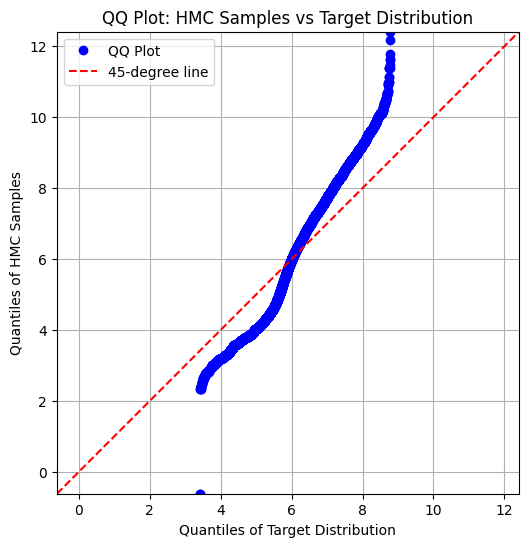

In [47]:
# 计算目标分布的理论分位数（混合高斯分布的分位数）
def target_quantile(p):
    return weight1 * norm.ppf(p, mu1, np.sqrt(sigma1)) + weight2 * norm.ppf(p, mu2, np.sqrt(sigma2))

# 排序HMC样本
sorted_hmc_samples = np.sort(samples_10000)

# 计算样本的分位数（经验分位数）
sample_quantiles = np.linspace(0.01, 0.99, len(sorted_hmc_samples))

# 计算目标分布的理论分位数
target_quantiles = target_quantile(sample_quantiles)


# 创建画布和坐标轴
fig, ax = plt.subplots(figsize=(8, 6))  # 设置画布的大小为宽：高 = 4:3
ax.plot(target_quantiles, sorted_hmc_samples, 'o', label="QQ Plot", color='blue')
ax.plot([min(sorted_hmc_samples), max(sorted_hmc_samples)], [min(sorted_hmc_samples), max(sorted_hmc_samples)], 'r--', label="45-degree line")
# 设置x轴和y轴的范围相同
min_val = min(min(target_quantiles), min(sorted_hmc_samples))
max_val = max(max(target_quantiles), max(sorted_hmc_samples))
ax.set_xlim(min_val, max_val)
ax.set_ylim(min_val, max_val)

# 设置坐标轴比例为正常，保持单位长度一致
ax.set_aspect('equal', adjustable='box')

# 设置标题和标签
ax.set_title("QQ Plot: HMC Samples vs Target Distribution")
ax.set_xlabel("Quantiles of Target Distribution")
ax.set_ylabel("Quantiles of HMC Samples")
ax.legend()
ax.grid(True)

# 显示图形
plt.show()

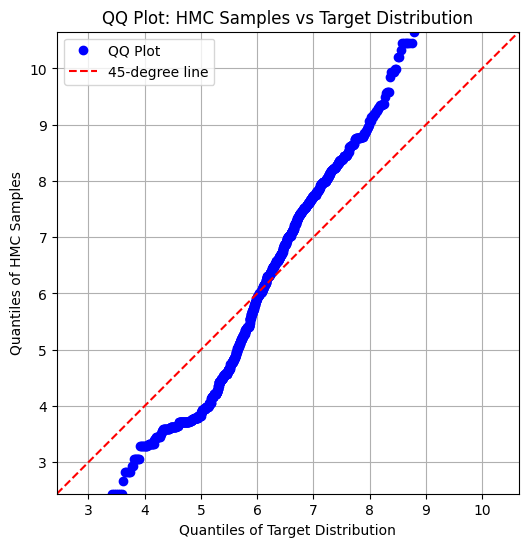

In [48]:
# 排序HMC样本
sorted_hmc_samples = np.sort(samples_1000)

# 计算样本的分位数（经验分位数）
sample_quantiles = np.linspace(0.01, 0.99, len(sorted_hmc_samples))

# 计算目标分布的理论分位数
target_quantiles = target_quantile(sample_quantiles)


# 创建画布和坐标轴
fig, ax = plt.subplots(figsize=(8, 6))  # 设置画布的大小为宽：高 = 4:3
ax.plot(target_quantiles, sorted_hmc_samples, 'o', label="QQ Plot", color='blue')
ax.plot([min(sorted_hmc_samples), max(sorted_hmc_samples)], [min(sorted_hmc_samples), max(sorted_hmc_samples)], 'r--', label="45-degree line")
# 设置x轴和y轴的范围相同
min_val = min(min(target_quantiles), min(sorted_hmc_samples))
max_val = max(max(target_quantiles), max(sorted_hmc_samples))
ax.set_xlim(min_val, max_val)
ax.set_ylim(min_val, max_val)

# 设置坐标轴比例为正常，保持单位长度一致
ax.set_aspect('equal', adjustable='box')

# 设置标题和标签
ax.set_title("QQ Plot: HMC Samples vs Target Distribution")
ax.set_xlabel("Quantiles of Target Distribution")
ax.set_ylabel("Quantiles of HMC Samples")
ax.legend()
ax.grid(True)

# 显示图形
plt.show()

# CAVI实现垃圾邮件分类

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score
import numpy as np
from scipy.special import digamma

data = pd.read_csv('D:\download\python_lianxi\github_source\data\enrom_span\enron_spam_data\enron_spam_data\enron_spam_data.csv')
data = data.dropna(axis=0,subset=['Message'])

In [3]:
vectorizer = CountVectorizer(stop_words='english', max_features=3000)  # 限制最大特征数为3000
X = vectorizer.fit_transform(data['Message'].values).toarray()
y = data['Spam/Ham'].values  # 标签：垃圾邮件与非垃圾邮件
y = (y=='ham').astype(int) #'ham'为1，'spam'为0

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [10]:
n_docs = X_train.shape[0]
vocab_size = 3000
# 超参数
alpha_0, beta_0 = 1, 1  # Beta分布的先验参数
eta = 1  # Dirichlet分布的先验参数
# 初始化变分分布参数
new_alpha = old_alpha = alpha_0
new_beta = old_beta = beta_0
new_phi = old_phi = np.random.dirichlet([eta] * vocab_size, size=2)  # 初始q(phi)
q_z = np.ones((n_docs, 2)) / 2  # 初始化q(z)
# CAVI 迭代
epsilon = 1e-5
iteration=0
max_iter=100
while iteration==0 or max(abs(new_alpha-old_alpha),abs(new_beta-old_beta),abs((new_phi-old_phi).max()))>epsilon:
# for iteration in range(max_iter):
    old_phi,old_alpha,old_beta = new_phi.copy(),new_alpha,new_beta
    # Step 1: 更新 q(z) (矢量化操作)
    log_q_z1 = digamma(new_alpha) - digamma(new_alpha + new_beta)  # P(y=1)
    log_q_z0 = digamma(new_beta) - digamma(new_alpha + new_beta)  # P(y=0)

    # 计算 log P(x | z=1) 和 log P(x | z=0) 的矩阵
    log_phi_z1 = digamma(new_phi[1, :]) - digamma(np.sum(new_phi[1]))
    log_phi_z0 = digamma(new_phi[0, :]) - digamma(np.sum(new_phi[0]))

    # 批量计算 q(z) 的分子
    log_q_z1_vec = log_q_z1 + X_train @ log_phi_z1  # log P(y=1) + sum(x_ij * log phi_j|z=1)
    log_q_z0_vec = log_q_z0 + X_train @ log_phi_z0  # log P(y=0) + sum(x_ij * log phi_j|z=0)

    # 转化为概率形式 (归一化)
    max_log = np.maximum(log_q_z1_vec, log_q_z0_vec).reshape(-1, 1)  # 防止溢出
    q_z[:, 1] = np.exp(log_q_z1_vec - max_log.ravel())
    q_z[:, 0] = np.exp(log_q_z0_vec - max_log.ravel())
    q_z /= np.sum(q_z, axis=1, keepdims=True)  # 每行归一化

    # Step 2: 更新 q(theta) (矢量化操作)
    new_alpha = alpha_0 + np.sum(q_z[:, 1])
    new_beta = beta_0 + np.sum(q_z[:, 0])

    # Step 3: 更新 q(phi) (矢量化操作)
    # q_phi[z, j] = eta + sum_i q(z_i=z) * x_ij
    for z in range(2):
        new_phi[z, :] = eta + np.sum(X_train * q_z[:, z][:, np.newaxis], axis=0)  # 按单词维度累加
    new_phi /= np.sum(new_phi, axis=1, keepdims=True)  # 每个类别归一化

    # 打印中间结果
    if  iteration % 10 == 0:
        print(f"Iteration {iteration + 1}: q_theta_alpha = {new_alpha:.4f}, q_theta_beta = {new_beta:.4f}  ",abs((new_phi-old_phi).max()))
    iteration += 1



Iteration 1: q_theta_alpha = 11989.5000, q_theta_beta = 11353.5000   0.023164148899877064
Iteration 11: q_theta_alpha = 4000.7231, q_theta_beta = 19342.2769   7.083456986634908e-05


In [21]:
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import KFold
import numpy as np
from scipy.special import digamma

# 数据初始化
n_docs = X.shape[0]  # 数据总量
vocab_size = 3000  # 词汇表大小

# 超参数
alpha_0, beta_0 = 1, 1  # Beta分布的先验参数
eta = 1  # Dirichlet分布的先验参数

# 交叉验证参数
k_folds = 5  # K折交叉验证
kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)

# 存储每一折的 F1 Score 和 Accuracy
accuracy_scores = []
f1_scores = []

# 交叉验证
for fold, (train_index, val_index) in enumerate(kf.split(X)):
    print(f"Starting fold {fold + 1}/{k_folds}")
    
    # 数据划分
    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = y[train_index], y[val_index]

    # 初始化变分分布参数
    new_alpha = old_alpha = alpha_0
    new_beta = old_beta = beta_0
    new_phi = old_phi = np.random.dirichlet([eta] * vocab_size, size=2)  # 初始q(phi)
    q_z = np.ones((X_train.shape[0], 2)) / 2  # 初始化q(z)

    # CAVI 迭代
    epsilon = 1e-5
    iteration = 0
    max_iter = 100

    while iteration == 0 or max(abs(new_alpha - old_alpha), abs(new_beta - old_beta), abs((new_phi - old_phi).max())) > epsilon:
        old_phi, old_alpha, old_beta = new_phi.copy(), new_alpha, new_beta

        # Step 1: 更新 q(z) (矢量化操作)
        log_q_z1 = digamma(new_alpha) - digamma(new_alpha + new_beta)  # P(y=1)
        log_q_z0 = digamma(new_beta) - digamma(new_alpha + new_beta)  # P(y=0)

        # 计算 log P(x | z=1) 和 log P(x | z=0) 的矩阵
        log_phi_z1 = digamma(new_phi[1, :]) - digamma(np.sum(new_phi[1]))
        log_phi_z0 = digamma(new_phi[0, :]) - digamma(np.sum(new_phi[0]))

        # 批量计算 q(z) 的分子
        log_q_z1_vec = log_q_z1 + X_train @ log_phi_z1  # log P(y=1) + sum(x_ij * log phi_j|z=1)
        log_q_z0_vec = log_q_z0 + X_train @ log_phi_z0  # log P(y=0) + sum(x_ij * log phi_j|z=0)

        # 转化为概率形式 (归一化)
        max_log = np.maximum(log_q_z1_vec, log_q_z0_vec).reshape(-1, 1)  # 防止溢出
        q_z[:, 1] = np.exp(log_q_z1_vec - max_log.ravel())
        q_z[:, 0] = np.exp(log_q_z0_vec - max_log.ravel())
        q_z /= np.sum(q_z, axis=1, keepdims=True)  # 每行归一化

        # Step 2: 更新 q(theta) (矢量化操作)
        new_alpha = alpha_0 + np.sum(q_z[:, 1])
        new_beta = beta_0 + np.sum(q_z[:, 0])

        # Step 3: 更新 q(phi) (矢量化操作)
        # q_phi[z, j] = eta + sum_i q(z_i=z) * x_ij
        for z in range(2):
            new_phi[z, :] = eta + np.sum(X_train * q_z[:, z][:, np.newaxis], axis=0)  # 按单词维度累加
        new_phi /= np.sum(new_phi, axis=1, keepdims=True)  # 每个类别归一化

        # 打印中间结果
        iteration += 1
        if iteration > max_iter:
            break

    # 验证集预测概率
    log_phi_z1 = digamma(new_phi[1, :]) - digamma(np.sum(new_phi[1]))
    log_phi_z0 = digamma(new_phi[0, :]) - digamma(np.sum(new_phi[0]))

    log_q_z1_vec = digamma(new_alpha) - digamma(new_alpha + new_beta) + X_val @ log_phi_z1
    log_q_z0_vec = digamma(new_beta) - digamma(new_alpha + new_beta) + X_val @ log_phi_z0

    # P(y=1)
    prob_y1 = np.exp(log_q_z1_vec) / (np.exp(log_q_z1_vec) + np.exp(log_q_z0_vec))

    # 预测标签
    y_pred = (prob_y1 >= 0.5).astype(int)

    # 计算 Accuracy 和 F1 Score
    acc = max(accuracy_score(y_val, y_pred), accuracy_score(y_val, 1-y_pred))
    f1 = max(f1_score(y_val, y_pred),f1_score(y_val, 1-y_pred))
    accuracy_scores.append(acc)
    f1_scores.append(f1)

    print(f"Fold {fold + 1}: Accuracy = {acc:.4f}, F1 Score = {f1:.4f}")

# 计算平均 Accuracy 和 F1 Score
mean_acc = np.mean(accuracy_scores)
std_acc = np.std(accuracy_scores)
mean_f1 = np.mean(f1_scores)
std_f1 = np.std(f1_scores)

print(f"Average Accuracy: {mean_acc:.4f} ± {std_acc:.4f}")
print(f"Average F1 Score: {mean_f1:.4f} ± {std_f1:.4f}")


Starting fold 1/5


C:\Users\24274\AppData\Local\Temp\ipykernel_29392\2968833669.py:85: RuntimeWarning: invalid value encountered in divide
  prob_y1 = np.exp(log_q_z1_vec) / (np.exp(log_q_z1_vec) + np.exp(log_q_z0_vec))


Fold 1: Accuracy = 0.5052, F1 Score = 0.6685
Starting fold 2/5


C:\Users\24274\AppData\Local\Temp\ipykernel_29392\2968833669.py:85: RuntimeWarning: invalid value encountered in divide
  prob_y1 = np.exp(log_q_z1_vec) / (np.exp(log_q_z1_vec) + np.exp(log_q_z0_vec))


Fold 2: Accuracy = 0.5064, F1 Score = 0.6601
Starting fold 3/5


C:\Users\24274\AppData\Local\Temp\ipykernel_29392\2968833669.py:85: RuntimeWarning: invalid value encountered in divide
  prob_y1 = np.exp(log_q_z1_vec) / (np.exp(log_q_z1_vec) + np.exp(log_q_z0_vec))


Fold 3: Accuracy = 0.5073, F1 Score = 0.6602
Starting fold 4/5


C:\Users\24274\AppData\Local\Temp\ipykernel_29392\2968833669.py:85: RuntimeWarning: invalid value encountered in divide
  prob_y1 = np.exp(log_q_z1_vec) / (np.exp(log_q_z1_vec) + np.exp(log_q_z0_vec))


Fold 4: Accuracy = 0.5010, F1 Score = 0.6659
Starting fold 5/5
Fold 5: Accuracy = 0.5101, F1 Score = 0.6576
Average Accuracy: 0.5060 ± 0.0030
Average F1 Score: 0.6624 ± 0.0041


C:\Users\24274\AppData\Local\Temp\ipykernel_29392\2968833669.py:85: RuntimeWarning: invalid value encountered in divide
  prob_y1 = np.exp(log_q_z1_vec) / (np.exp(log_q_z1_vec) + np.exp(log_q_z0_vec))


训练集平均准确率: 0.9674014095066727
测试集平均准确率: 0.9669815564552406
训练集平均F1-score: 0.9672034349948273
测试集平均F1-score: 0.9667954020777405


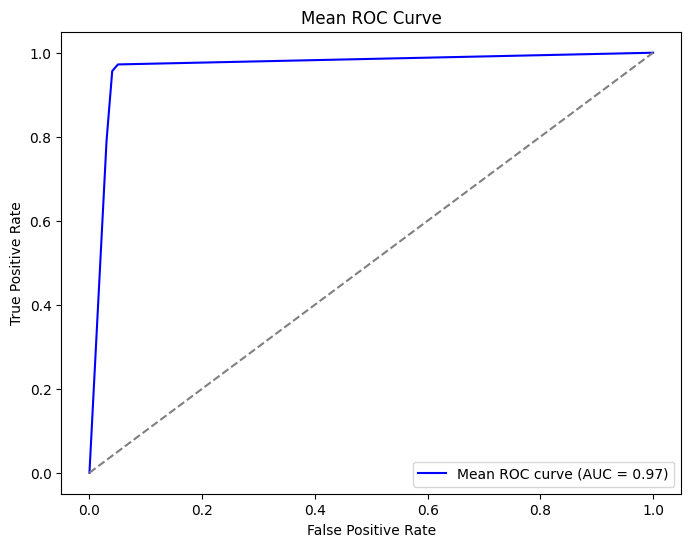

q_theta_alpha = 13196, q_theta_beta = 13482
phi_z0 (正常邮件单词分布): [4.08526541e-03 4.21704816e-03 3.72728837e-04 ... 4.62223096e-05
 9.83453397e-07 2.73400044e-04]
phi_z1 (垃圾邮件单词分布): [3.19514252e-03 2.48504008e-03 1.84690319e-05 ... 1.49662845e-04
 2.58566446e-04 7.06918117e-05]


In [5]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score, roc_curve, auc
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import label_binarize

# 数据预处理
vectorizer = CountVectorizer(stop_words='english', max_features=3000)  # 限制最大特征数为3000
X = vectorizer.fit_transform(data['Message'].values).toarray()
y = data['Spam/Ham'].values  # 标签：垃圾邮件与非垃圾邮件
y = (y == 'ham').astype(int)  # 'ham' 为 1，'spam' 为 0

alpha_0, beta_0 = 1, 1  # Beta分布先验
eta = 1  # Dirichlet分布先验

# 交叉验证
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
accuracies_train = []
accuracies_test = []
f1_scores_train = []
f1_scores_test = []
fpr_list = []
tpr_list = []
roc_auc_list = []

# 交叉验证循环
for train_index, test_index in kf.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # 更新 q(theta)
    q_theta_alpha = alpha_0 + np.sum(y_train == 1)  # 计算垃圾邮件比例的 alpha 参数
    q_theta_beta = beta_0 + np.sum(y_train == 0)  # 计算正常邮件比例的 beta 参数

    # 更新 q(phi)
    q_phi_z0 = eta + np.sum(X_train[y_train == 0], axis=0)  # 类别 z=0 的单词计数
    q_phi_z1 = eta + np.sum(X_train[y_train == 1], axis=0)  # 类别 z=1 的单词计数

    # 将 q_phi 归一化
    phi_z0 = q_phi_z0 / np.sum(q_phi_z0)
    phi_z1 = q_phi_z1 / np.sum(q_phi_z1)

    # 预测函数
    def predict(X_test, phi_z0, phi_z1, theta_spam, theta_ham):
        # 计算每封邮件的对数似然
        log_spam_probs = X_test @ np.log(phi_z1 + 1e-6)  # 避免 log(0) 的数值错误
        log_ham_probs = X_test @ np.log(phi_z0 + 1e-6)

        # 加上先验概率的对数
        log_spam_probs += np.log(theta_spam)
        log_ham_probs += np.log(theta_ham)

        # 比较垃圾邮件和正常邮件的对数概率
        predicted_labels = (log_spam_probs > log_ham_probs).astype(int)
        return predicted_labels

    # 分类预测
    predicted_train = predict(X_train, phi_z0, phi_z1, 1 - y_train.sum() / len(y_train), y_train.sum() / len(y_train))
    predicted_test = predict(X_test, phi_z0, phi_z1, 1 - y_train.sum() / len(y_train), y_train.sum() / len(y_train))

    # 计算训练和测试集的准确率和F1-score
    accuracies_train.append(accuracy_score(y_train, predicted_train))
    accuracies_test.append(accuracy_score(y_test, predicted_test))
    f1_scores_train.append(f1_score(y_train, predicted_train))
    f1_scores_test.append(f1_score(y_test, predicted_test))

    # 计算 ROC 曲线数据
    fpr, tpr, _ = roc_curve(y_test, predicted_test)
    roc_auc = auc(fpr, tpr)
    fpr_list.append(fpr)
    tpr_list.append(tpr)
    roc_auc_list.append(roc_auc)

# 打印交叉验证结果
print(f"训练集平均准确率: {np.mean(accuracies_train)}")
print(f"测试集平均准确率: {np.mean(accuracies_test)}")
print(f"训练集平均F1-score: {np.mean(f1_scores_train)}")
print(f"测试集平均F1-score: {np.mean(f1_scores_test)}")

# 绘制ROC曲线
mean_fpr = np.linspace(0, 1, 100)
mean_tpr = np.zeros_like(mean_fpr)

for i in range(len(fpr_list)):
    mean_tpr += np.interp(mean_fpr, fpr_list[i], tpr_list[i])

mean_tpr /= len(fpr_list)

plt.figure(figsize=(8, 6))
plt.plot(mean_fpr, mean_tpr, color='b', label=f'Mean ROC curve (AUC = {np.mean(roc_auc_list):.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Mean ROC Curve')
plt.legend(loc='lower right')
plt.show()

# 打印最后的参数
print(f"q_theta_alpha = {q_theta_alpha}, q_theta_beta = {q_theta_beta}")
print(f"phi_z0 (正常邮件单词分布): {phi_z0}")
print(f"phi_z1 (垃圾邮件单词分布): {phi_z1}")


# 七

In [5]:
import time
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import numpy as np

# 加载Iris数据集
data = load_iris()
X = data.data
y = data.target

# 定义模型
models = {
    "SVM": SVC(kernel='linear', random_state=42),
    "Neural Network": MLPClassifier(hidden_layer_sizes=(10,), max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42),
    "AdaBoost": AdaBoostClassifier(n_estimators=50, random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Naive Bayes": GaussianNB(),
    "LDA": LinearDiscriminantAnalysis()
}

# 定义交叉验证并计算准确率和F1-score
scoring = ['accuracy', 'f1_macro']  # 我们可以使用多种评分方式，accuracy 和 f1_macro 适合多分类问题
results = {}

for model_name, model in models.items():
    print(f"Evaluating {model_name}...")
    
    # 记录开始时间
    start_time = time.time()
    
    # 使用交叉验证评估模型
    accuracy_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
    f1_scores = cross_val_score(model, X, y, cv=5, scoring='f1_macro')
    
    # 记录结束时间
    end_time = time.time()
    elapsed_time = end_time - start_time  # 计算运行时间

    # 保存模型的结果
    results[model_name] = {
        "accuracy_mean": np.mean(accuracy_scores),
        "accuracy_std": np.std(accuracy_scores),
        "f1_mean": np.mean(f1_scores),
        "f1_std": np.std(f1_scores),
        "time_taken": elapsed_time  # 添加运行时间
    }

# 打印每个模型的平均准确率、F1-score 和运行时间
for model_name, result in results.items():
    print(f"\n{model_name}:")
    print(f"Average Accuracy: {result['accuracy_mean']:.4f} ± {result['accuracy_std']:.4f}")
    print(f"Average F1-score: {result['f1_mean']:.4f} ± {result['f1_std']:.4f}")
    print(f"Time Taken: {result['time_taken']:.4f} seconds")


Evaluating SVM...
Evaluating Neural Network...


d:\download\anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
d:\download\anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
d:\download\anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
d:\download\anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
d:\download\anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron

Evaluating Random Forest...
Evaluating XGBoost...


C:\Users\24274\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [14:47:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\24274\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [14:47:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\24274\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [14:47:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg,

Evaluating AdaBoost...


d:\download\anaconda\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
d:\download\anaconda\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
d:\download\anaconda\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
d:\download\anaconda\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
d:\download\anaconda\Lib\sit

Evaluating Logistic Regression...
Evaluating Decision Tree...
Evaluating KNN...
Evaluating Naive Bayes...
Evaluating LDA...

SVM:
Average Accuracy: 0.9800 ± 0.0163
Average F1-score: 0.9799 ± 0.0164
Time Taken: 0.0170 seconds

Neural Network:
Average Accuracy: 0.9733 ± 0.0249
Average F1-score: 0.9732 ± 0.0252
Time Taken: 1.7058 seconds

Random Forest:
Average Accuracy: 0.9667 ± 0.0211
Average F1-score: 0.9665 ± 0.0213
Time Taken: 0.7658 seconds

XGBoost:
Average Accuracy: 0.9533 ± 0.0163
Average F1-score: 0.9531 ± 0.0165
Time Taken: 0.9068 seconds

AdaBoost:
Average Accuracy: 0.9467 ± 0.0340
Average F1-score: 0.9463 ± 0.0342
Time Taken: 0.4780 seconds

Logistic Regression:
Average Accuracy: 0.9733 ± 0.0249
Average F1-score: 0.9732 ± 0.0252
Time Taken: 0.0758 seconds

Decision Tree:
Average Accuracy: 0.9533 ± 0.0340
Average F1-score: 0.9532 ± 0.0341
Time Taken: 0.0150 seconds

KNN:
Average Accuracy: 0.9733 ± 0.0249
Average F1-score: 0.9732 ± 0.0252
Time Taken: 0.0408 seconds

Naive Bayes